*Maestría de Ciencia de Datos - UNAJ*

# Trabajo Final: Aplicaciones de Ciencia de datos

*Febrero 2026*

## Integrantes
- Raul Burgos
- Mauro Cejas Marcovecchio
- Raul Muñoz
- Mirta Soto

## Descripción

El objetivo del siguiente trabajo es el análisis exploratorio, preprocesamiento de datos y el desarrollo de modelos de machine
learning para la predicción de la radiación global. El dataset utilizado fue obtenido a partir del Sistema de Información y Gestión Agrometeorológica (SIGA), del [Instituto Nacional de Tecnología Agropecuaria (INTA)](https://siga.inta.gob.ar/). Esta base de datos contiene información de tres estaciones meteorológicas  ubicadas en las localidades de Goya, Bella Vista y Herliszka, en la Provincia de Corrientes, Argentina.

En esta provincia, el clima es subtropical sin estación seca, destacando el clima subtropical húmedo en el noreste. Según el último informe agroclimático anual de Bella Vista publicado por el INTA en 2020, la temperatura media mensual osciló entre los 14.8.3 y 26.9 °C. Las precipitaciones son abundantes en Corrientes, en la que el promedio anual histórico se ubica en los 1.258.5 mm de lluvia, aunque durante el año mencionado se haya registrado una caída considerable, con 794.7 mm anuales. Los periodos lluviosos se dan especialmente en los equinoccios de otoño y primavera, siendo el invierno y el verano las estaciones más secas del año. Los veranos son muy sofocantes: las temperaturas máximas en 2020 llegaron a los 40 °C, sumadas a la elevada humedad del ambiente. En cambio los inviernos son templados-fríos. Los vientos que más afectan a la provincia son el norte muy cálido proveniente de Brasil, el pampero frío y seco proveniente de la Patagonia y la sudestada frío y húmedo proveniente del mar argentino.

In [ ]:
# Acá estaría bueno agregar un mapa con la ubicación de las estaciones

## EDA y Preprocesamiento

### Preprocesamiento básico y limpieza inicial

El punto de partida del trabajo serán los tres datasets provistos, uno por cada estación meteorológica. A partir de ellos, podremos comprobar que todos están compuestos por las mismas 33 variables. Por lo tanto, luego de incorporar la ubicación geográfica de cada estación, es decir, su latitud, longitud y el nombre de la localidad correspondiente, procederemos a unificarlos en una sola base de datos. Al comprobar que las tres localidades están ubicadas en alturas sobre el nivel del mar similares (de 57 a 66 m.s.n.m.), factor que podría haber sido determinante sobre nuestra variable objetivo, se decidió no incorporarlo al análisis.

In [50]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# Primero que nada, tenemos que importar al entorno los tres archivos provistos.
# Debido a que se trata de archivos .xls, tenemos que utilizar el engine 'xlrd' al momento de importarlos.
# El problema es que la librería xlrd ya no soporta archivos xls a partir de su versión 2.0.1
# Por lo tanto, deberíamos crear un entorno virtual con una versión anterior de xlrd (1.2.0)
# De todas formas, vamos a optar por el camino más sencillo, que es guardar los archivos en formato .xlsx manualmente y luego importarlos.

dataset1 = pd.read_excel('data/A872950.xlsx')
dataset2 = pd.read_excel('data/A872951.xlsx')
dataset3 = pd.read_excel('data/A872952.xlsx')

In [52]:
# Con shape vamos a comprobar que los datasets tienen la misma cantidad de dimensiones.

print("Dimensiones:", dataset1.shape)
print("Dimensiones:", dataset2.shape)
print("Dimensiones:", dataset3.shape)

Dimensiones: (3939, 30)
Dimensiones: (3714, 30)
Dimensiones: (2220, 30)


In [53]:
# Mediante columns vamos a poder ver que las tres tablas tienen las mismas columnas y tipos de datos.
# Por lo tanto, podemos proceder a unificarlas en un solo dataset.

display(dataset1.head())
display(dataset2.head())
display(dataset3.head())


Fecha  Temperatura_Abrigo_150cm  \
0  2013-09-03 00:00:00.0                       NaN   
1  2013-09-04 00:00:00.0                  13.49305   
2  2013-09-05 00:00:00.0                  17.53334   
3  2013-09-06 00:00:00.0                  22.60834   
4  2013-09-07 00:00:00.0                  26.51389   

   Temperatura_Abrigo_150cm_Maxima  Temperatura_Abrigo_150cm_Minima  \
0                              NaN                              NaN   
1                             23.5                              5.4   
2                             28.9                              9.7   
3                             34.1                             13.8   
4                             36.3                             20.3   

   Temperatura_Intemperie_5cm_Minima  Temperatura_Intemperie_50cm_Minima  \
0                                NaN                                 NaN   
1                                NaN                                 NaN   
2                                NaN                                 NaN   
3                                NaN                                 NaN   
4                                NaN                                 NaN   

   Temperatura_Suelo_5cm_Media  Temperatura_Suelo_10cm_Media  \
0                          NaN                           NaN   
1                          NaN                      17.35556   
2                          NaN                      18.86459   
3                          NaN                      21.49792   
4                          NaN                      23.58055   

   Temperatura_Inte_5cm  Temperatura_Intemperie_150cm_Minima  ...  \
0                   NaN                                  NaN  ...   
1                   NaN                                  NaN  ...   
2                   NaN                                  NaN  ...   
3                   NaN                                  NaN  ...   
4                   NaN                                  NaN  ...   

   Duracion_Follaje_Mojado  Velocidad_Viento_200cm_Media  \
0                      NaN                           NaN   
1                      NaN                           NaN   
2                      NaN                           NaN   
3                      NaN                           NaN   
4                      NaN                           NaN   

   Direccion_Viento_200cm  Velocidad_Viento_1000cm_Media  \
0                                                    NaN   
1                      C                             NaN   
2                      C                             NaN   
3                      C                             NaN   
4                      C                             NaN   

   Direccion_Viento_1000cm  Velocidad_Viento_Maxima  Presion_Media  \
0                                               NaN            NaN   
1                       C                       NaN            NaN   
2                       C                       NaN            NaN   
3                       C                       NaN            NaN   
4                       C                       NaN            NaN   

   Radiacion_Global  Horas_Frio  Unidades_Frio  
0               NaN         NaN            NaN  
1               NaN    3.153999       0.498000  
2               NaN    0.000000      -9.129999  
3               NaN    0.000000     -16.849020  
4               NaN    0.000000     -23.904030  

[5 rows x 30 columns]

Fecha  Temperatura_Abrigo_150cm  \
0  2015-06-17 00:00:00.0                       NaN   
1  2015-06-18 00:00:00.0                 12.249300   
2  2015-06-19 00:00:00.0                  7.765971   
3  2015-06-20 00:00:00.0                 12.806940   
4  2015-06-21 00:00:00.0                 17.692360   

   Temperatura_Abrigo_150cm_Maxima  Temperatura_Abrigo_150cm_Minima  \
0                              NaN                              NaN   
1                             16.6                              4.8   
2                             16.9                              0.7   
3                             23.1                              4.9   
4                             24.5                             11.2   

   Temperatura_Intemperie_5cm_Minima  Temperatura_Intemperie_50cm_Minima  \
0                                NaN                                 NaN   
1                                NaN                                 NaN   
2                                NaN                                 NaN   
3                                NaN                                 NaN   
4                                NaN                                 NaN   

   Temperatura_Suelo_5cm_Media  Temperatura_Suelo_10cm_Media  \
0                          NaN                           NaN   
1                          NaN                      15.74861   
2                          NaN                      14.23125   
3                          NaN                      14.83264   
4                          NaN                      16.94722   

   Temperatura_Inte_5cm  Temperatura_Intemperie_150cm_Minima  ...  \
0                   NaN                                  NaN  ...   
1                   NaN                                  NaN  ...   
2                   NaN                                  NaN  ...   
3                   NaN                                  NaN  ...   
4                   NaN                                  NaN  ...   

   Duracion_Follaje_Mojado  Velocidad_Viento_200cm_Media  \
0                      NaN                           NaN   
1                      0.0                      5.001389   
2                      0.0                      1.181945   
3                      0.0                      1.984723   
4                      0.0                      0.681250   

   Direccion_Viento_200cm  Velocidad_Viento_1000cm_Media  \
0                                                    NaN   
1                      S                        6.251736   
2                      C                        1.477431   
3                      C                        2.480903   
4                      C                        0.851562   

   Direccion_Viento_1000cm  Velocidad_Viento_Maxima  Presion_Media  \
0                                               NaN            NaN   
1                       C                      27.9       1017.305   
2                       C                      16.0       1016.818   
3                       C                      21.2       1009.115   
4                       C                      11.1       1008.278   

   Radiacion_Global  Horas_Frio  Unidades_Frio  
0               NaN         NaN            NaN  
1          11.31648    4.481998      10.292000  
2          11.54208    9.129998      10.375000  
3          10.90698    5.477998      -1.660001  
4          10.87110    0.000000     -11.371000  

[5 rows x 30 columns]

Fecha  Temperatura_Abrigo_150cm  \
0  2015-06-19 00:00:00.0                       NaN   
1  2015-06-20 00:00:00.0                  12.14236   
2  2015-06-21 00:00:00.0                  16.65139   
3  2015-06-22 00:00:00.0                  19.01180   
4  2015-06-23 00:00:00.0                  13.88334   

   Temperatura_Abrigo_150cm_Maxima  Temperatura_Abrigo_150cm_Minima  \
0                              NaN                              NaN   
1                             21.8                              3.1   
2                             24.6                             11.4   
3                             26.3                             15.9   
4                             17.9                             12.0   

   Temperatura_Intemperie_5cm_Minima  Temperatura_Intemperie_50cm_Minima  \
0                                NaN                                 NaN   
1                                NaN                                 NaN   
2                                NaN                                 NaN   
3                                NaN                                 NaN   
4                                NaN                                 NaN   

   Temperatura_Suelo_5cm_Media  Temperatura_Suelo_10cm_Media  \
0                          NaN                           NaN   
1                          NaN                      14.78195   
2                          NaN                      17.09167   
3                          NaN                      18.54306   
4                          NaN                      16.89722   

   Temperatura_Inte_5cm  Temperatura_Intemperie_150cm_Minima  ...  \
0                   NaN                                  NaN  ...   
1                   NaN                                  NaN  ...   
2                   NaN                                  NaN  ...   
3                   NaN                                  NaN  ...   
4                   NaN                                  NaN  ...   

   Duracion_Follaje_Mojado  Velocidad_Viento_200cm_Media  \
0                      NaN                           NaN   
1                 6.666666                      2.851390   
2                 9.816666                      0.645833   
3                15.466680                      5.950001   
4                23.766650                     10.965970   

   Direccion_Viento_200cm  Velocidad_Viento_1000cm_Media  \
0                                                    NaN   
1                      C                        3.564237   
2                      C                        0.807292   
3                      SE                       7.437501   
4                      SE                      13.707460   

   Direccion_Viento_1000cm  Velocidad_Viento_Maxima  Presion_Media  \
0                                               NaN            NaN   
1                       C                      20.8       1010.810   
2                       C                       6.6       1009.883   
3                       C                      34.2       1009.385   
4                       C                      30.7       1014.676   

   Radiacion_Global  Horas_Frio  Unidades_Frio  
0               NaN         NaN            NaN  
1          10.51584    7.469996      -0.581001  
2           7.15782    0.000000      -9.213003  
3           4.81752    0.000000     -16.849010  
4           0.94734    0.000000       3.153999  

[5 rows x 30 columns]

In [54]:
# Antes de consolidar la información, vamos a incorporar la ubicación geográfica de cada estación meteorológica.
# Esto lo hacemos agregando tres columnas nuevas: 'Latitud', 'Longitud' y 'Localidad'

dataset1['Latitud'] = -29.1784992218018
dataset1['Longitud'] = -59.0923004150391
dataset1['Localidad'] = 'Goya' 

dataset2['Latitud'] = -28.452600479126
dataset2['Longitud'] = -58.9865989685059
dataset2['Localidad'] = 'Bella Vista'

dataset3['Latitud'] = -27.6566638946533
dataset3['Longitud'] = -58.2937927246094
dataset3['Localidad'] = 'Herliszka'

In [55]:
df = pd.concat([dataset1, dataset2, dataset3], ignore_index=True)
df.shape

(9873, 33)

#### Cantidad de registros y variables

De esta manera, dispondremos de un total de 9873 registros y 36 variables. Aún así, a lo largo de esta etapa del trabajo se irán descartando aquellas variables que no tengan la suficiente calidad, cantidad o representatividad como para formar parte del conjunto de variables explicativas que nos permitan predecir la radiación global, como ya se ha mencionado.

En este caso, podremos comprobar que las variables vinculadas a la medición de la temperatura a la intemperie y el suelo a 5 cm de altura no tendrán valores válidos. Tampoco los tendrá la variable que mide la humedad del suelo. Por este motivo, se procederá a descartarlas.

Asimismo, las variables vinculadas a la Heliofanía serán excluidas del dataset y su posterior análisis, ya que se trata de fenómenos físicos intrínsicamente ligados a la radiación solar. Su inclusión, en vez de permitir la identificación de factores subyacentes que la expliquen, daría como resultado una predicción casi perfecta pero carente de utilidad analítica.

Por último, viendo que las Temperaturas a la Intemperie a 50 y 150 cm Mínimas tienen aproximadamente el 85% de valores faltantes, vamos a descartarlas también.

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9873 entries, 0 to 9872
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Fecha                                9873 non-null   object 
 1   Temperatura_Abrigo_150cm             9508 non-null   float64
 2   Temperatura_Abrigo_150cm_Maxima      9493 non-null   float64
 3   Temperatura_Abrigo_150cm_Minima      9487 non-null   float64
 4   Temperatura_Intemperie_5cm_Minima    0 non-null      float64
 5   Temperatura_Intemperie_50cm_Minima   1404 non-null   float64
 6   Temperatura_Suelo_5cm_Media          0 non-null      float64
 7   Temperatura_Suelo_10cm_Media         9116 non-null   float64
 8   Temperatura_Inte_5cm                 0 non-null      float64
 9   Temperatura_Intemperie_150cm_Minima  1412 non-null   float64
 10  Humedad_Suelo                        0 non-null      float64
 11  Precipitacion_Pluviometrica   

In [57]:
# Descartamos la medición de la temperatura a la intemperie, el suelo a 5 cm, la Heliofania,
# y las temperaturas mínimas medidas al intemperie.
df = df.dropna(axis = 1, how = 'all')
df = df.drop(columns = ['Heliofania_Efectiva', 'Heliofania_Relativa',
                        'Temperatura_Intemperie_50cm_Minima', 'Temperatura_Intemperie_150cm_Minima'])

# Vamos a convertir la columna 'Fecha' en un objeto datetime, para facilitar su manipulación posterior.
df['Fecha'] = pd.to_datetime(df['Fecha'])

#### Tipos de variables

Así, podremos ver que el dataset estará compuesto por tipos de datos categóricos (aquellos referidos a la dirección del viento y al nombre de la localidad), geoespaciales (latitud y longitud), temporales (fecha) y numéricos (todos los demás).  

In [58]:
df.info(show_counts=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9873 entries, 0 to 9872
Data columns (total 25 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   Fecha                            datetime64[ns]
 1   Temperatura_Abrigo_150cm         float64       
 2   Temperatura_Abrigo_150cm_Maxima  float64       
 3   Temperatura_Abrigo_150cm_Minima  float64       
 4   Temperatura_Suelo_10cm_Media     float64       
 5   Precipitacion_Pluviometrica      float64       
 6   Precipitacion_Cronologica        float64       
 7   Precipitacion_Maxima_30minutos   float64       
 8   Tesion_Vapor_Media               float64       
 9   Humedad_Media                    float64       
 10  Humedad_Media_8_14_20            float64       
 11  Rocio_Medio                      float64       
 12  Duracion_Follaje_Mojado          float64       
 13  Velocidad_Viento_200cm_Media     float64       
 14  Direccion_Viento_200cm           object 

#### Valores faltantes, duplicados e inconsistencias

In [59]:
print("Valores faltantes por columna:")
print(df.isnull().sum().sort_values(ascending=False))

Valores faltantes por columna:
Precipitacion_Maxima_30minutos     1549
Rocio_Medio                        1119
Velocidad_Viento_1000cm_Media       875
Velocidad_Viento_200cm_Media        875
Duracion_Follaje_Mojado             832
Radiacion_Global                    832
Presion_Media                       832
Velocidad_Viento_Maxima             824
Temperatura_Suelo_10cm_Media        757
Precipitacion_Cronologica           744
Precipitacion_Pluviometrica         724
Horas_Frio                          447
Unidades_Frio                       446
Tesion_Vapor_Media                  436
Humedad_Media_8_14_20               398
Temperatura_Abrigo_150cm_Minima     386
Temperatura_Abrigo_150cm_Maxima     380
Humedad_Media                       371
Temperatura_Abrigo_150cm            365
Longitud                              0
Latitud                               0
Fecha                                 0
Direccion_Viento_1000cm               0
Direccion_Viento_200cm                0
Localidad

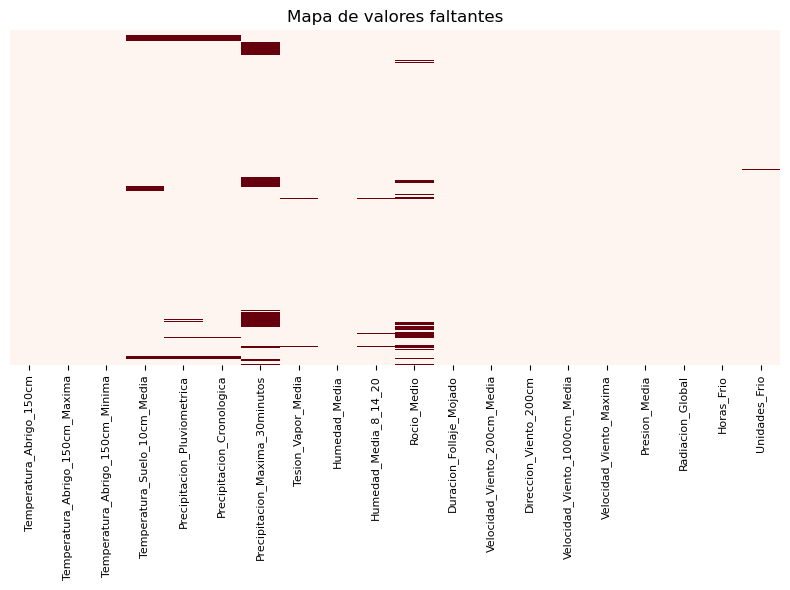

In [67]:
# Visualización simple de patrón de faltantes

fig, ax = plt.subplots(figsize = (8, 6))
sns.heatmap(
    df.drop(columns = ['Fecha', 'Latitud', 'Longitud', 'Localidad']).isnull(), 
            cbar = False, 
            cmap = 'Reds')
plt.title('Mapa de valores faltantes')
plt.ylabel('')
plt.yticks([])
plt.xticks(fontsize = 8)
plt.tight_layout()
plt.show()

Como podemos observar en el mapa, hay múltiples filas en las que se encuentran faltantes en todas las columnas menos en las referidas a la Dirección del viento y la fecha. Por lo tanto, vamos a identificarlas y descartarlas.

In [61]:
cols_analisis = df.columns.difference(['Fecha', 'Direccion_Viento_200cm', 'Direccion_Viento_1000cm', 'Latitud', 'Longitud', 'Localidad'])
filas_vacias = df[cols_analisis].isna().all(axis = 1)

In [62]:
df = df.loc[~filas_vacias].copy()

Además, puede notarse que la variable objetivo del trabajo, la radiación global, posee una gran cantidad de valores faltantes, principalmente al inicio de los registros del dataset. Teniendo en cuenta que nuestro objetivo será su predicción, deberemos descartar los registros en los que esta variable presente valores nulos.

In [64]:
filas_vacias = df['Radiacion_Global'].isna()
df = df.loc[~filas_vacias].copy()

In [39]:
print("Filas duplicadas:")
print(df.duplicated().sum())

Filas duplicadas:
0


#### Valores atípicos

Por un lado, resulta interesante notar que los valores de la categoría referida a la dirección del viento a 1000 cm son nulos o una 'C'. Ésto es diferente a lo que ocurre en el caso de esta misma medición a 200 cm, que correctamente integra los distintos puntos cardinales. Más allá de suponer que la 'C' significa viento 'calmo' y, considerando que el 97% de los valores de esa categoría toman el mismo valor, procederemos a dejarla de lado.

In [66]:
# Inconsistencias

print(df['Direccion_Viento_200cm'].unique())
print(df['Direccion_Viento_1000cm'].unique())

df = df.drop(columns=['Direccion_Viento_1000cm'])

['C ' 'S ' 'W ' 'E ' 'SE' 'NE' 'N ' 'NW']
['C ']


Por otro lado, vamos a utilizar dos métodos gráficos para continuar con la detección de outliers:
- Diagramas de cajas y bigotes
- Diagramas de dispersión

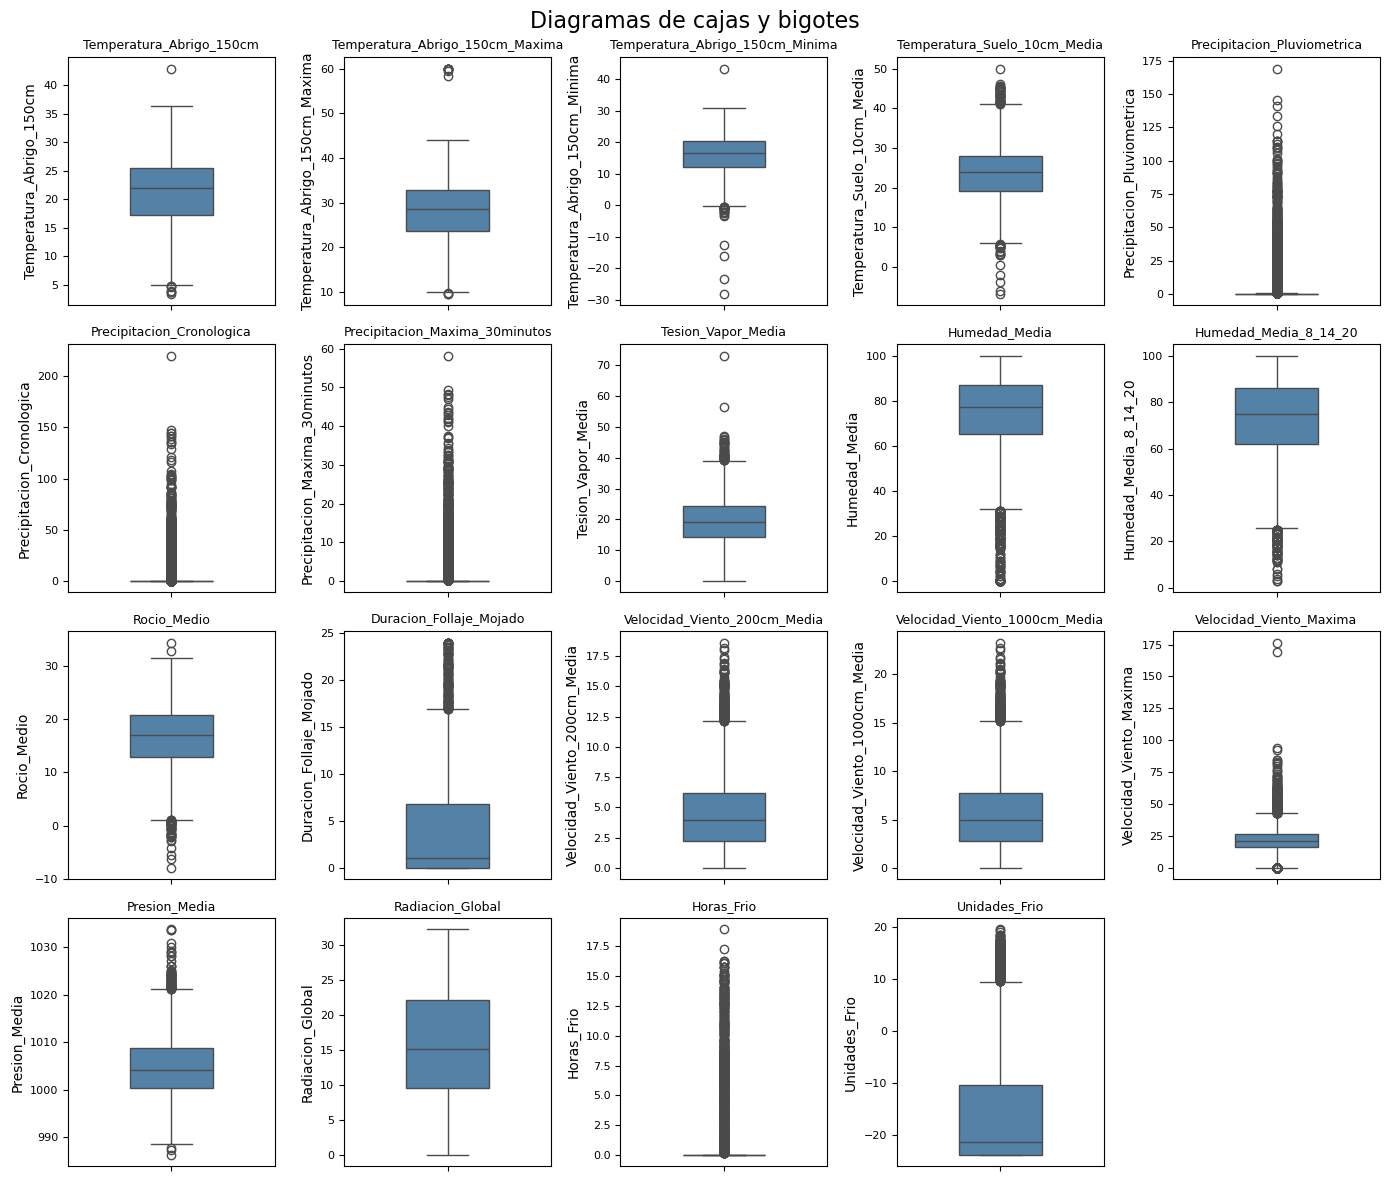

In [73]:
variables = df.drop(columns = ['Fecha', 'Latitud', 'Longitud', 'Localidad', 'Direccion_Viento_200cm']).columns

# Diagramas de cajas y bigotes

n_cols = 5
n_rows = 4

fig, axes = plt.subplots(
    n_rows,
    n_cols,
    figsize = (14, 12),
    sharey = False)

fig.suptitle('Diagramas de cajas y bigotes', fontsize = 16)

axes = axes.flatten()

for i, var in enumerate(variables):
    sns.boxplot(
        y = df[var],
        ax = axes[i],
        color = 'steelblue',
        width = 0.4
    )
    axes[i].set_title(var, fontsize = 9)
    axes[i].set_xlabel('')
    axes[i].tick_params(axis = 'y', labelsize = 8)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [80]:
# Diagramas de dispersión

n_cols = 1
n_rows = 19

fig, axes = plt.subplots(
    n_rows,
    n_cols,
    figsize = (14, 38),
    sharex = True)

fig.suptitle('Diagramas de dispersión', fontsize = 16)

axes = axes.flatten()

for i, var in enumerate(variables):
    sns.scatterplot(
        x = df['Fecha'],
        y = df[var],
        ax = axes[i],
        s = 15,
        #alpha = 0.4,
        #hue = df['Localidad'],
        color = 'steelblue'
    )
    axes[i].set_title(var, fontsize = 9)
    axes[i].set_ylabel(var, fontsize=8)
    axes[i].tick_params(axis = 'y', labelsize = 8)

axes[-1].set_xlabel('Fecha', fontsize=9)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

### Resumen estadístico

In [ ]:
# Obtener las principales medidas de posición y de dispersión de cada variable.

variables = df.drop(columns=['Fecha', 'Latitud', 'Longitud'])
resumen = variables.describe()
resumen.loc['IQR'] = resumen.loc['75%'] - resumen.loc['25%']
resumen.loc['Moda'] = variables.mode().iloc[0]

orden = [
    'count', 'min', '25%',
    '50%', 'mean', '75%', 'max',
    'IQR', 'Moda', 'std',
]

resumen = resumen.loc[orden].round(2)
display(resumen.T)

count     min      25%      50%     mean  \
Temperatura_Abrigo_150cm         9508.0    3.41    17.36    21.94    21.29   
Temperatura_Abrigo_150cm_Maxima  9493.0    9.50    23.60    28.50    27.99   
Temperatura_Abrigo_150cm_Minima  9487.0  -28.10    12.10    16.70    15.90   
Temperatura_Suelo_10cm_Media     9116.0   -6.80    19.16    23.94    23.69   
Precipitacion_Pluviometrica      9149.0    0.00     0.00     0.00     3.01   
Precipitacion_Cronologica        9129.0    0.00     0.00     0.00     3.02   
Precipitacion_Maxima_30minutos   8324.0    0.00     0.00     0.00     1.19   
Tesion_Vapor_Media               9437.0    0.01    14.45    19.22    19.44   
Humedad_Media                    9502.0    0.00    65.00    77.00    74.71   
Humedad_Media_8_14_20            9475.0    3.00    62.00    75.00    73.17   
Rocio_Medio                      8754.0   -7.96    12.85    17.07    16.48   
Duracion_Follaje_Mojado          9041.0    0.00     0.00     1.08     3.57   
Velocidad_Viento_200cm_Media     8998.0    0.00     2.22     3.95     4.48   
Velocidad_Viento_1000cm_Media    8998.0    0.00     2.78     4.94     5.60   
Velocidad_Viento_Maxima          9049.0    0.00    16.10    20.70    22.07   
Presion_Media                    9041.0  986.28  1000.38  1004.11  1004.73   
Radiacion_Global                 9041.0    0.02     9.59    15.17    15.51   
Horas_Frio                       9426.0    0.00     0.00     0.00     0.53   
Unidades_Frio                    9427.0  -23.90   -23.90   -21.33   -15.87   

                                     75%      max    IQR     Moda    std  
Temperatura_Abrigo_150cm           25.55    42.96   8.19    24.91   5.62  
Temperatura_Abrigo_150cm_Maxima    32.70    60.00   9.10    29.70   6.38  
Temperatura_Abrigo_150cm_Minima    20.20    43.30   8.10    19.80   5.75  
Temperatura_Suelo_10cm_Media       27.85    50.00   8.69    27.58   5.83  
Precipitacion_Pluviometrica         0.00   169.00   0.00     0.00  11.22  
Precipitacion_Cronologica           0.00   220.00   0.00     0.00  11.65  
Precipitacion_Maxima_30minutos      0.00    58.20   0.00     0.00   4.36  
Tesion_Vapor_Media                 24.23    73.20   9.78    11.67   6.84  
Humedad_Media                      87.00   100.00  22.00   100.00  17.39  
Humedad_Media_8_14_20              86.00   100.00  24.00   100.00  17.09  
Rocio_Medio                        20.69    34.39   7.84    10.56   5.58  
Duracion_Follaje_Mojado             6.77    24.00   6.77     0.00   4.58  
Velocidad_Viento_200cm_Media        6.19    18.63   3.97     0.00   3.04  
Velocidad_Viento_1000cm_Media       7.74    23.29   4.96     0.00   3.80  
Velocidad_Viento_Maxima            26.80   176.60  10.70     0.00  10.14  
Presion_Media                    1008.71  1033.71   8.33  1004.44   6.12  
Radiacion_Global                   22.14    32.27  12.55     4.24   7.86  
Horas_Frio                          0.00    18.92   0.00     0.00   2.07  
Unidades_Frio                     -10.62    19.51  13.28   -23.90  10.68

In [84]:
# Histogramas

variables = df.drop(
    columns=['Fecha', 'Latitud', 'Longitud', 'Localidad', 'Direccion_Viento_200cm']
).columns

n_cols = 5
n_rows = 4

fig, axes = plt.subplots(
    n_rows,
    n_cols,
    figsize = (14, 12),
    sharey = False
)

fig.suptitle('Histogramas', fontsize = 16)

axes = axes.flatten()

for i, var in enumerate(variables):
    sns.histplot(
        df[var],
        ax = axes[i],
        bins = 30,
        color = 'steelblue',
        kde = True
    )
    axes[i].set_title(var, fontsize = 9)
    axes[i].set_xlabel('')
    axes[i].tick_params(axis = 'both', labelsize = 8)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



### Visualizaciones: análisis bivariado y multivariado

In [23]:
variables = df.drop(
    columns=['Fecha', 'Latitud', 'Longitud', 'Localidad',
             'Direccion_Viento_200cm', 'Radiacion_Global']
).columns

n_cols = 5
n_rows = 4

fig, axes = plt.subplots(
    n_rows,
    n_cols,
    figsize = (14, 12),
    sharey = True
)

fig.suptitle(
    'Relación de variables con Radiacion_Global',
    fontsize = 16
)

axes = axes.flatten()

for i, var in enumerate(variables):
    sns.scatterplot(
        x = df[var],
        y = df['Radiacion_Global'],
        ax = axes[i],
        color = 'steelblue',
        s = 10,
        alpha = 0.6
    )

    axes[i].set_title(var, fontsize = 9)
    axes[i].set_xlabel('')
    axes[i].tick_params(axis = 'both', labelsize = 8)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



In [24]:
# Tal vez estaría bueno hacer el pairplot multivariado con una selección de variables.

# Ver cómo hacer el Análisis de componentes principales (PCA) o Clustering. 

variables = df.drop(columns=['Fecha', 'Latitud', 'Longitud', 'Localidad', 'Direccion_Viento_200cm'])

corr = variables.corr(numeric_only = True)
plt.figure(figsize = (10, 8))
sns.heatmap(corr, cmap =  "coolwarm", center = 0)
plt.show()

### Preprocesamiento y limpieza avanzada de datos.

In [25]:
# Comparación de estrategias para el tratamiento de valores faltantes: Medias, KNN o Iterative Imputer
# Podría ser KNN por tratarse de datos con correlaciones locales fuertes.

# Ver formas de quitar los outliers sin que sea de forma manual. Tal vez Z-score para las que se distribuyan normalmente.
# Valores con |zi|>3 suelen considerarse outliers (más de 3 desviaciones estándar de la media).
# Pág 22 limpieza avanzada.
# Si lo hicieramos con IQR creo que dejariamos afuera mucha data.
# Analizar estrategia: eliminar, recortar, transformar o modelar aparte

# Ver si hay que codificar variables categóricas (Localidad, Dirección del viento)

# Deberíamos escalar las variables para que sean comparables? Normalización y Estandarización.



### Conclusiones parciales

In [26]:
# Elaborar conclusiones parciales que sinteticen los principales hallazgos del análisis
# exploratorio y las decisiones de preprocesamiento adoptadas.

In [ ]:
# Deberíamos hacer el análisis de componentes principales (PCA) para reducción de dimensionalidad.????

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df.select_dtypes(include='number').dropna()
X_scaled = StandardScaler().fit_transform(X)

pca = PCA()
pca.fit(X_scaled)

PCA()

In [29]:
pca.explained_variance_ratio_.cumsum()



array([0.37032411, 0.5674215 , 0.70662013, 0.79695053, 0.83735053,
       0.87387201, 0.90409557, 0.93109473, 0.94980407, 0.96640696,
       0.9796113 , 0.98599369, 0.99190187, 0.99638216, 0.99807811,
       0.99928974, 0.99973444, 1.        , 1.        ])

In [34]:
corr_y = variables.corr(numeric_only=True)['Radiacion_Global'].sort_values(ascending=False)
corr_y


Radiacion_Global                   1.000000
Temperatura_Abrigo_150cm_Maxima    0.615602
Temperatura_Suelo_10cm_Media       0.482025
Temperatura_Abrigo_150cm           0.480531
Temperatura_Abrigo_150cm_Minima    0.209639
Tesion_Vapor_Media                 0.191012
Rocio_Medio                        0.148702
Velocidad_Viento_Maxima           -0.016575
Velocidad_Viento_1000cm_Media     -0.054209
Velocidad_Viento_200cm_Media      -0.054209
Horas_Frio                        -0.101006
Presion_Media                     -0.124556
Precipitacion_Pluviometrica       -0.159020
Precipitacion_Maxima_30minutos    -0.219353
Precipitacion_Cronologica         -0.269531
Duracion_Follaje_Mojado           -0.321718
Unidades_Frio                     -0.324004
Humedad_Media                     -0.355774
Humedad_Media_8_14_20             -0.477795
Name: Radiacion_Global, dtype: float64

## Modelado, Evaluación e Interpretabilidad

### Selección de modelos

Seleccionar al menos dos algoritmos de machine learning adecuados para el problema
planteado y justificar su elección.

### Entrenamiento, validación y optimización de modelos

Realizar el entrenamiento de los modelos seleccionados, incorporando técnicas de
validación cruzada (cross-validation) y la optimización de hiperparámetros mediante algún
método de búsqueda (por ejemplo, Grid Search, Random Search u otros).

Describir el esquema de validación utilizado y los principales hiperparámetros optimizados.

### Evaluación y análisis de resultados

Evaluar y comparar el desempeño de los modelos utilizando métricas adecuadas para el
problema.

Visualizar y analizar el output de los modelos, incluyendo comparaciones entre valores
reales y predichos sobre el conjunto de test.

Detallar y representar gráficamente la “confianza” o incertidumbre asociada a las
predicciones, cuando corresponda.

### Interpretabilidad de los modelos

Realizar un análisis de interpretabilidad de los modelos entrenados, identificando las variables
más relevantes y discutiendo su impacto en las predicciones.

### Conclusiones

Elaborar conclusiones integradoras a partir de los resultados obtenidos, destacando
fortalezas, limitaciones y posibles mejoras


## Bibliografía

- Gentile, E., Martin, P. y Gatti, I. (2020). Argentina físico-natural:
Clima. ANIDA. Atlas Nacional Interactivo de Argentina. Instituto
Geográfico Nacional. 
https://static.ign.gob.ar/anida/fasciculos/fasc_afn_clima.pdf

- Provincia de Corrientes. (2026). Wikipedia, La enciclopedia libre. 
https://es.wikipedia.org/w/index.php?title=Provincia_de_Corrientes&oldid=171816566.

- 